In [1]:
using Distances, DataFrames, Color, Gadfly, Distributions, Interact, Reactive

include("TaxonomyExample.jl")
include("BlahutArimoto.jl")
include("InformationTheoryFunctions.jl")
include("ConversionFunctions.jl")
include("VisualizationFunctions.jl")
include("ThreeVariableBlahutArimoto.jl")

#make the default plot size a bit larger
set_default_plot_size(15cm, 12cm)

In [2]:
#set up taxonomy example
include("TaxonomyExample.jl")
w_vec, w_strings, a_vec, a_strings, p_w, U = setuptaxonomy()


#pre-compute utilities, find maxima
U_pre, Umax = setuputilityarrays(a_vec,w_vec,U)

#visualize utility
plt_utility = visualizeMatrix(U_pre, w_vec, a_vec, w_strings, a_strings, xlabel="World state w",
                              ylabel="Recommend a", legendlabel="U(a,w)")


#solve the example with one-step Blahut-Arimoto
β = 1.3 #inverse temperature
ε = 0.0001 #convergence critetion for BAiterations
maxiter = 10000 #maximum number of BA iterations

#initialize p(a) uniformly
num_acts = length(a_vec)
pa_init = ones(num_acts)/num_acts 

#Blahut-Arimotot iterations
p_agw_one, p_a_one, perf_df_one = BAiterations(pa_init, β, U_pre, p_w, ε, maxiter,
                                               compute_performance=true, performance_as_dataframe=true)

#visualize solution
plt_marg, plt_cond = visualizeBAsolution(p_a_one, p_agw_one, a_vec, w_vec, a_strings, w_strings,
                                         wlabel="Item bought w", alabel="Recommend a",
                                         legendlabel_marginal="p(a)", legendlabel_conditional="p*(a|w)",
                                         suppress_vis=true);

display(plt_utility)
display(plt_cond)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 2 
 1 
 3 
 0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 U(a,w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Recommend a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Item bought w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Recommend a

In [3]:
#approaching sequential
#β1 = 10 #inverse temperature for p(o)→p(o|w)
#β2 = 10 #inverse temperature for p(a)→p(a|o)
#β3 = 0.01 #inverse temperature for p(a|o)→p(a|o,w)


#β1=β3 and β2=∞ is identical to the one-variable case
#β1 = 1.3 #inverse temperature for p(o)→p(o|w)
#β2 = Inf #inverse temperature for p(a)→p(a|o)
#β3 = 1.3 #inverse temperature for p(a|o)→p(a|o,w)

#parallel β2=∞
#β1 = 1.1 #inverse temperature for p(o)→p(o|w)
#β2 = Inf #inverse temperature for p(a)→p(a|o)
#β3 = 1.25 #inverse temperature for p(a|o)→p(a|o,w)

#sequential β3=0
β1 = 1.6*β #inverse temperature for p(o)→p(o|w)
β2 = β1 #inverse temperature for p(a)→p(a|o)
β3 = 0 #inverse temperature for p(a|o)→p(a|o,w)


ε = 0.0001 #convergence critetion for BAiterations
maxiter = 2000 #maximum number of BA iterations

#cardinality of percept
num_obs = length(a_vec) #cardinality of percept is equal to action-space
o_vec = [1:num_obs]
o_strings = map((x)->"o"*string(x), o_vec)

num_worldstates = length(w_vec)

#manually initialize p(o|w) and p(a|o,w)
#initialize p(o|w) with the one-step solution
pogw_init = p_agw_one

#initialize p(o|w) randomly
#pogw_init = rand(num_obs, num_worldstates)
#initialize p(o|w) uniformly
#pogw_init = ones(num_obs, num_worldstates)
#normalize
for j in 1:num_worldstates
    pogw_init[:,j] /= sum(pogw_init[:,j])
end


#initialize p(a|o,w) randomly
p_agow_init = rand(num_acts, num_obs, num_worldstates)         
#initialize p(a|o,w) uniformly
#p_agow_init = ones(num_acts, num_obs, num_worldstates)         
#normalize
for j in 1:num_worldstates       
    for k in 1:num_obs
        p_agow_init[:,:,j] /= sum(p_agow_init[:,:,j])
    end
end   


#This function performs Blahut-Arimoto iterations for the three-variable general case
po, pa, pogw, pago, pagow, pagw, performance_df = threevarBAiterations(pogw_init, p_agow_init,
                                                  β1, β2, β3, U_pre, p_w, ε, maxiter,
                                                  compute_performance=true, performance_per_iteration=true,
                                                  performance_as_dataframe=true);

Questions/Observations:
*  Parallel case $\beta_2=\infty$:
 * To reproduce the one-step case: $\beta_1 = \beta_3$
    * Initialize $p(o|w)$ uniformly $(p(a|o,w)$ seems to play no role)
    * Random initialization of $p(o|w)$ -> ?
    * Initialize $p(o|w)$ with one-step solution -> ?
 * In case of different $\beta_1$ and $\beta_3$
    * It seems to make no big difference how you initialize $p(o|w)$?
    * Maybe $p(a|o,w)$ plays a bigger role now?
 * To find a solution that does better than the one-step case (i.e. higher objective-value)
    * ?
    * Ill-posed - more constraints needed (e.g. both inverse temperatures are lower, etc.)
    
    
*  Serial case $\beta_3=0$
 * To reproduce MEU-solution:
    * Initialize $p(o|w)$ in a diagonal-matrix fashion - perhaps the one-step solution is a nice initialization (but this only works in case the percept has the same cardinality as the action space - maybe it would be better to find a more general pretraining scheme...)?
 * To reproduce one-step solution:
    * Initialize with one-step solution and increase $\beta$ a bit (until the value of the objective is identical), use same $\beta$ for both channels
 * What happens when you initialize with one-step solution?
 * What happens when you initialize $p(o|w)$ randomly/uniformly?
 * What role does the initialization of $p(o|w,a)$ play and how does it relate to the initialization of $p(a|o)$?
 
**TODO: plot solutions of several runs (random-init, uniform-init, one-step solution init, diagonal init) into the rate-distortion curve (determined by the one-step case).** Can you see any qualitative differences?  
With this argument, the parallel case can never be "better" than the one-step case, but perhaps there are regimes that produce interesting percepts (however the range of temperatures to allow for that seems to be quite narrow). Maybe the parallel case only starts making sense when the utility depends on the percept as well as in Dan's search in two dimensions with different search cost? (But what about the memory-adaptation paper then - maybe the example is just bad...?)  
Maybe the parallel case starts making more sense when the cardinality of the percept is reduced?


Parallel case: $p(a|o)$ can be quite deterministic (since there is no cost for $p(a)\rightarrow p(a|o)$ which means that $I(A;O)$ can be very large. Therefore, if the percept has a sufficient cardinality, most of the mapping will happen in $p(a|o)$. If you limit the cardinality of the percept, then it starts to play the role of a model... (explore this further).

If $\beta_1 < \beta_3$ everything happens in $p(a|o,w)$ and all the MI is in $I(A;W|O)$

If $\beta_1 > \beta_3$ (and the percept has a low cardinality) most stuff happens in $I(O;W)$ such that $I(A;W|O)$ can be kept lower.

If $\beta_1 = \beta_3$ and the percept has a low cardinality, the one-step case is reproduced in an interesting fashion (where both MI terms do roughly the same).

In [4]:
#plot convergence (i.e. evolution across BA iterations)
plot_convergence_MI, plot_convergence_Util = plot_three_var_BA_convergence(performance_df);

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 
 Objective J 
 
 
 
 
 
 
 
 E[U] 
 
 
 
 
 
 
 
 
 
 
 Iteration 
 
 
 -200 
 -150 
 -100 
 -50 
 0 
 50 
 100 
 150 
 200 
 250 
 300 
 350 
 -150 
 -145 
 -140 
 -135 
 -130 
 -125 
 -120 
 -115 
 -110 
 -105 
 -100 
 -95 
 -90 
 -85 
 -80 
 -75 
 -70 
 -65 
 -60 
 -55 
 -50 
 -45 
 -40 
 -35 
 -30 
 -25 
 -20 
 -15 
 -10 
 -5 
 0 
 5 
 10 
 15 
 20 
 25 
 30 
 35 
 40 
 45 
 50 
 55 
 60 
 65 
 70 
 75 
 80 
 85 
 90 
 95 
 100 
 105 
 110 
 115 
 120 
 125 
 130 
 135 
 140 
 145 
 150 
 155 
 160 
 165 
 170 
 175 
 180 
 185 
 190 
 195 
 200 
 205 
 210 
 215 
 220 
 225 
 230 
 235 
 240 
 245 
 250 
 255 
 260 
 265 
 270 
 275 
 280 
 285 
 290 
 295 
 300 
 -200 
 0 
 200 
 400 
 -150 
 -140 
 -130 
 -120 
 -110 
 -100 
 -90 
 -80 
 -70 
 -60 
 -50 
 -40 
 -30 
 -20 
 -10 
 0 
 10 
 20 
 30 
 40 
 50 
 60 
 70 
 80 
 90 
 100 
 110 
 120 
 130 
 140 
 150 
 160 
 170 
 180 
 190 
 200 
 210 
 220 
 230 
 240 
 250 
 260 
 270 
 280 
 290 
 300 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path fill="none" d="M21.71,74.34 L 22.53 72.62 23.34 71.56 24.16 71.01 24.97 70.68 25.78 70.42 26.6 70.21 27.41 70.02 28.23 69.85 29.04 69.71 29.85 69.59 30.67 69.51 31.48 69.45 32.3 69.41 33.11 69.39 33.92 69.37 34.74 69.37 35.55 69.36 36.37 69.36 37.18 69.35 37.99 69.35 38.81 69.35 39.62 69.35 40.44 69.35 41.25 69.35 42.06 69.35 42.88 69.35 43.69 69.35 44.51 69.35 45.32 69.35 46.13 69.35 46.95 69.35 47.76 69.35 48.58 69.35 49.39 69.35 50.2 69.35 51.02 69.35 51.83 69.35 52.65 69.35 53.46 69.35 54.27 69.35 55.09 69.35 55.9 69.35 56.72 69.35 57.53 69.35 58.34 69.35 59.16 69.35 59.97 69.35 60.79 69.35 61.6 69.35 62.41 69.35 63.23 69.35 64.04 69.35 64.86 69.35 65.67 69.35 66.48 69.35 67.3 69.35 68.11 69.35 68.93 69.35 69.74 69.35 70.55 69.35 71.37 69.35 72.18 69.35 73 69.35 73.81 69.35 74.62 69.35 75.44 69.35 76.25 69.35 77.07 69.35 77.88 69.35 78.69 69.35 79.51 69.35 80.32 69.35 81.14 69.35 81.95 69.35 82.76 69.35 83.58 69.35 84.39 69.35 85.21 69.35 86.02 69.35 86.83 69.35 87.65 69.35 88.46 69.35 89.28 69.35 90.09 69.35 90.9 69.35 91.72 69.35 92.53 69.35 93.35 69.35 94.16 69.35 94.97 69.35 95.79 69.35 96.6 69.35 97.42 69.35 98.23 69.35 99.04 69.35 99.86 69.35 100.67 69.35 101.49 69.35 102.3 69.35 103.11 69.35 103.93 69.35 104.74 69.35 105.56 69.35 106.37 69.35 107.18 69.35 108 69.35 108.81 69.35 109.63 69.35 110.44 69.35 111.25 69.35 112.07 69.35" stroke="#004D84" class="geometry color_E[U]"/>
 <path fill="none" d="M21.71,84.4 L 22.53 83.19 23.34 83.05 24.16 83.09 24.97 83.13 25.78 83.17 26.6 83.2 27.41 83.23 28.23 83.26 29.04 83.28 29.85 83.31 30.67 83.33 31.48 83.34 32.3 83.35 33.11 83.35 33.92 83.36 34.74 83.36 35.55 83.36 36.37 83.36 37.18 83.36 37.99 83.36 38.81 83.36 39.62 83.36 40.44 83.36 41.25 83.36 42.06 83.36 42.88 83.36 43.69 83.36 44.51 83.36 45.32 83.36 46.13 83.36 46.95 83.36 47.76 83.36 48.58 83.36 49.39 83.36 50.2 83.36 51.02 83.36 51.83 83.36 52.65 83.36 53.46 83.36 54.27 83.36 55.09 83.36 55.9 83.36 56.72 83.36 57.53 83.36 58.34 83.36 59.16 83.36 59.97 83.36 60.79 83.36 61.6 83.36 62.41 83.36 63.23 83.36 64.04 83.36 64.86 83.36 65.67 83.36 66.48 83.36 67.3 83.36 68.11 83.36 68.93 83.36 69.74 83.36 70.55 83.36 71.37 83.36 72.18 83.36 73 83.36 73.81 83.36 74.62 83.36 75.44 83.36 76.25 83.36 77.07 83.36 77.88 83.36 78.69 83.36 79.51 83.36 80.32 83.36 81.14 83.36 81.95 83.36 82.76 83.36 83.58 83.36 84.39 83.36 85.21 83.36

In [5]:
#Check whether different initializations lead to the same solution

#Check whether producing the different special-cases works! (perhaps the random initialization
#leads to problems for the sequential case, since the weight for I(A;W|O) is very large,
#leading to p(a|o)=p(a|o,w), but the initial solutions violate this condition?)
#If producing the special cases by simply setting the temperature properly doesn't work, implement
#the sequential and parallel case as well! (in that case try to write visualization functions that
#can handle any of the cases)

#TODO: when initializing randomly, can it be that inconsistencies between p(o|w) and p(a|o,w) cause problems?

#TODO: the uniform initialization also seems to be problematic... perhaps it's too symmetric?

#Another reason for the NaNs could be that entries in distributions are driven to 0, which then 
#causes problems with the D_KL: either add some ϵ, or rewrite the D_KL to handle these cases.
#In case of the latter solution also make sure to take care of the log-ratio in the second update equation for 
#the general case.

In [6]:
#call the routine that creates plots for all the probability distributions
plt_po, plt_pa, plt_pogw, plt_pago, plt_pagw, dpdown, plt_pagow_vis = visualize_three_var_BAsolution(po, pa,
                                                                      pogw, pago, pagow, pagw,
                                                                      o_vec, a_vec, w_vec,
                                                                      o_strings, a_strings, w_strings, 
                                                                      olabel_string="o", alabel_string="a", wlabel_string="w")

#visualize p(o) and p(a)
display(hstack(plt_po,plt_pa))

#visualize p(o|w)
display(plt_pogw)
#visualize p(a|o)
display(plt_pago)

#visualize p(a|w)
display(plt_pagw)

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a 
 
 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 Observation o

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(o|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 Observation o

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Observation o 
 
 
 o1 
 o2 
 o3 
 o4 
 o5 
 o6 
 o7 
 o8 
 o9 
 o10 
 o11 
 o12 
 o13 
 o14 
 o15 
 o16 
 o17 
 o18 
 o19 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|o) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 World state w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Action a

Options{:Dropdown,ASCIIString}([Input{ASCIIString}] Laptop,"World state w","Laptop","Laptop",OptionDict({"Laptop","Monitor","Gamepad","Coffee machine","Vacuum cleaner","Electric toothbrush","Grapes","Strawberries","Limes","Pancake mix","Baking soda","Baker's yeast","Muffin cups"},{"Limes"=>"Limes","Strawberries"=>"Strawberries","Baking soda"=>"Baking soda","Muffin cups"=>"Muffin cups","Gamepad"=>"Gamepad","Electric toothbrush"=>"Electric toothbrush","Monitor"=>"Monitor","Pancake mix"=>"Pancake mix","Coffee machine"=>"Coffee machine","Laptop"=>"Laptop","Vacuum cleaner"=>"Vacuum cleaner","Grapes"=>"Grapes","Baker's yeast"=>"Baker's yeast"}))

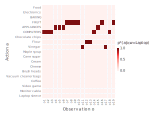

In [7]:
#visualize p(a|o,w)
display(dpdown)  #show the dropdown box to interactively select wk in p(a|o,w=wk)
display(plt_pagow_vis)

#TODO: rather than the number, use the string here for the dropdown (if provided)

In [8]:
p_MI, p_composed, p_perf=plot_three_var_performancemeasures(performance_df, maximum(U_pre), β1, β2, β3)

display(hstack(p_MI, p_composed))
display(p_perf)

#TODO: for 
    #β1 = 8 #inverse temperature for p(o)→p(o|w)
    #β2 = 5 #inverse temperature for p(a)→p(a|o)
    #β3 = 2 #inverse temperature for p(a|o)→p(a|o,w)
#the entropy H(O|W) can't be that large - check for errors, there must be some I(O;W) as well, it can't be zero!


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 H(O) 
 H(A) 
 H(A|O) 
 H(A) 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 H(O|W) 
 H(A|O) 
 H(A|O,W) 
 H(A|W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Composition of entropic terms 
 
 
 
 
 I(O;W) 
 I(A;O) 
 I(A;W|O) 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -2.5 
 -2.0 
 -1.5 
 -1.0 
 -0.5 
 0.0 
 0.5 
 1.0 
 1.5 
 2.0 
 2.5 
 3.0 
 3.5 
 4.0 
 4.5 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 -2 
 0 
 2 
 4 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 
 
 [bits] 
 
 
 Mutual information terms

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 E[U] 
 E[U] 
 
 
 
 E[U] 
 1/β1 I(O;W) 
 1/β2 I(A;O) 
 1/β3 I(A;W|O) 
 J = E[U] - 1/β ∑ I 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 Utility vs. processing-cost trade-off

In [9]:
#compare solution against one-step case

#compare performance measures, EU, J, I(A;W)

util_all = [perf_df_one[end,:E_U], performance_df[end,:E_U],
            perf_df_one[end,:RD_obj], performance_df[end,:Objective_value]]

color_label = ["E[U]_one", "E[U]", "J_one", "J"]

p_perf_comp = plot(x=color_label, y=util_all, color=color_label, Geom.bar(),
                   Guide.ylabel("[utils]"), Guide.xlabel(""), Guide.colorkey(""),
                   Guide.title("One-step solution β=$β vs. \n multi-step β1=$β1, β2=$β2, β3 = $β3"),
                   BAdiscretecolorscale(4), Scale.y_continuous(minvalue=0, maxvalue=maximum(U_pre)),
                   BAtheme(key_position = :bottom))


MI_comp = [perf_df_one[end,:I_aw], performance_df[end,:I_aw]]
color_label = ["I(A;W)_one", "I(A;W)"]

colors = Scale.color_discrete_hue().f(4)
colscale = Scale.color_discrete_manual(colors[end],colors[end])

p_perf_comp_MI = plot(x=color_label, y=MI_comp, color=color_label, Geom.bar(),
                      Guide.ylabel("[bits]"), Guide.xlabel(""), Guide.colorkey(""),
                      Guide.title("I(A;W) for β=$β vs. \n multi-step β1=$β1, β2=$β2, β3 = $β3"),
                      colscale, Scale.y_continuous(minvalue=0, maxvalue=maximum(U_pre)), BAtheme(key_position = :none))

display(hstack(p_perf_comp,p_perf_comp_MI))

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 I(A;W)_one 
 I(A;W) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [bits] 
 
 
 I(A;W) for β=1.3 vs. multi-step β1=2.08, β2=2.08, β3 = 0 
 
 
 
 
 
 E[U]_one 
 E[U] 
 J_one 
 J 
 
 
 
 
 
 
 
 
 
 
 
 
 E[U]_one 
 E[U] 
 J_one 
 J 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -4 
 -3 
 -2 
 -1 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 -3.0 
 -2.9 
 -2.8 
 -2.7 
 -2.6 
 -2.5 
 -2.4 
 -2.3 
 -2.2 
 -2.1 
 -2.0 
 -1.9 
 -1.8 
 -1.7 
 -1.6 
 -1.5 
 -1.4 
 -1.3 
 -1.2 
 -1.1 
 -1.0 
 -0.9 
 -0.8 
 -0.7 
 -0.6 
 -0.5 
 -0.4 
 -0.3 
 -0.2 
 -0.1 
 0.0 
 0.1 
 0.2 
 0.3 
 0.4 
 0.5 
 0.6 
 0.7 
 0.8 
 0.9 
 1.0 
 1.1 
 1.2 
 1.3 
 1.4 
 1.5 
 1.6 
 1.7 
 1.8 
 1.9 
 2.0 
 2.1 
 2.2 
 2.3 
 2.4 
 2.5 
 2.6 
 2.7 
 2.8 
 2.9 
 3.0 
 3.1 
 3.2 
 3.3 
 3.4 
 3.5 
 3.6 
 3.7 
 3.8 
 3.9 
 4.0 
 4.1 
 4.2 
 4.3 
 4.4 
 4.5 
 4.6 
 4.7 
 4.8 
 4.9 
 5.0 
 5.1 
 5.2 
 5.3 
 5.4 
 5.5 
 5.6 
 5.7 
 5.8 
 5.9 
 6.0 
 -3 
 0 
 3 
 6 
 -3.0 
 -2.8 
 -2.6 
 -2.4 
 -2.2 
 -2.0 
 -1.8 
 -1.6 
 -1.4 
 -1.2 
 -1.0 
 -0.8 
 -0.6 
 -0.4 
 -0.2 
 0.0 
 0.2 
 0.4 
 0.6 
 0.8 
 1.0 
 1.2 
 1.4 
 1.6 
 1.8 
 2.0 
 2.2 
 2.4 
 2.6 
 2.8 
 3.0 
 3.2 
 3.4 
 3.6 
 3.8 
 4.0 
 4.2 
 4.4 
 4.6 
 4.8 
 5.0 
 5.2 
 5.4 
 5.6 
 5.8 
 6.0 
 
 
 [utils] 
 
 
 One-step solution β=1.3 vs. multi-step β1=2.08, β2=2.08, β3 = 0

In [10]:
#compare solutions p(a|w)
plt_cond_one = visualizeBAconditional(p_agw_one, a_vec, w_vec, a_strings, w_strings,
                                      wlabel="Item bought w", alabel="Recommend a",legendlabel="p*(a|w)_one")

plt_cond_multi = visualizeBAconditional(pagw, a_vec, w_vec, a_strings, w_strings,
                                         wlabel="Item bought w", alabel="Recommend a",legendlabel="p*(a|w)")

display(plt_cond_one)
display(plt_cond_multi)


<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Item bought w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w)_one 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Recommend a

<?xml version="1.0" encoding="UTF-8"?>
 
 
 
 Item bought w 
 
 
 Laptop 
 Monitor 
 Gamepad 
 Coffee machine 
 Vacuum cleaner 
 Electric toothbrush 
 Grapes 
 Strawberries 
 Limes 
 Pancake mix 
 Baking soda 
 Baker's yeast 
 Muffin cups 
 
 
 
 1.0 
 0.5 
 0.0 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 p*(a|w) 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Laptop sleeve 
 Monitor cable 
 Video game 
 Coffee 
 Vacuum cleaner bags 
 Brush heads 
 Cheese 
 Cream 
 Cane sugar 
 Maple syrup 
 Vinegar 
 Flour 
 Chocolate chips 
 COMPUTERS 
 APPLIANCES 
 FRUIT 
 BAKING 
 Electronics 
 Food 
 
 
 Recommend a

"Difference: norm(p*(a|w)_one - p*(a|w))=0.1942530721195267"

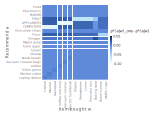

In [11]:
display("Difference: norm(p*(a|w)_one - p*(a|w))=$(norm(p_agw_one-pagw))")

plt_cond_multi = visualizeMatrix(p_agw_one - pagw, w_vec, a_vec, w_strings, a_strings,
xlabel="Item bought w", ylabel="Recommend a",legendlabel="p*(a|w)_one - p*(a|w)")

In [12]:
#for the paper
#hstack(p_MI, p_composed, p_perf)